### Heart Prediction

Importing required libraries 

In [53]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Reading the dataset using pandas into heart dataframe

In [5]:
heart = pd.read_csv('heart.csv')

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Looking at the first few data points, we can say that all the columns are numerical

Lets cross check by looking into info() of the dataframe

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the columns are of type int64 except the slope, which is float64

From the above info() details, we can tell that there are no null values

But still lets take the advantage of null method in pandas and check

In [9]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Now lets check the measures of central tendency and also percentails of each feature 

In [10]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Lets see wheather the data is balanced or not 

In [21]:
print("percentage of target people having heart problem :"+str(heart.target.value_counts()[1]/len(heart.target)))
print("percentage of target people not having heart problem :"+str(heart.target.value_counts()[0]/len(heart.target)))

percentage of target people having heart problem :0.5445544554455446
percentage of target people not having heart problem :0.45544554455445546


Based on the above result, we can say that the data is balanced

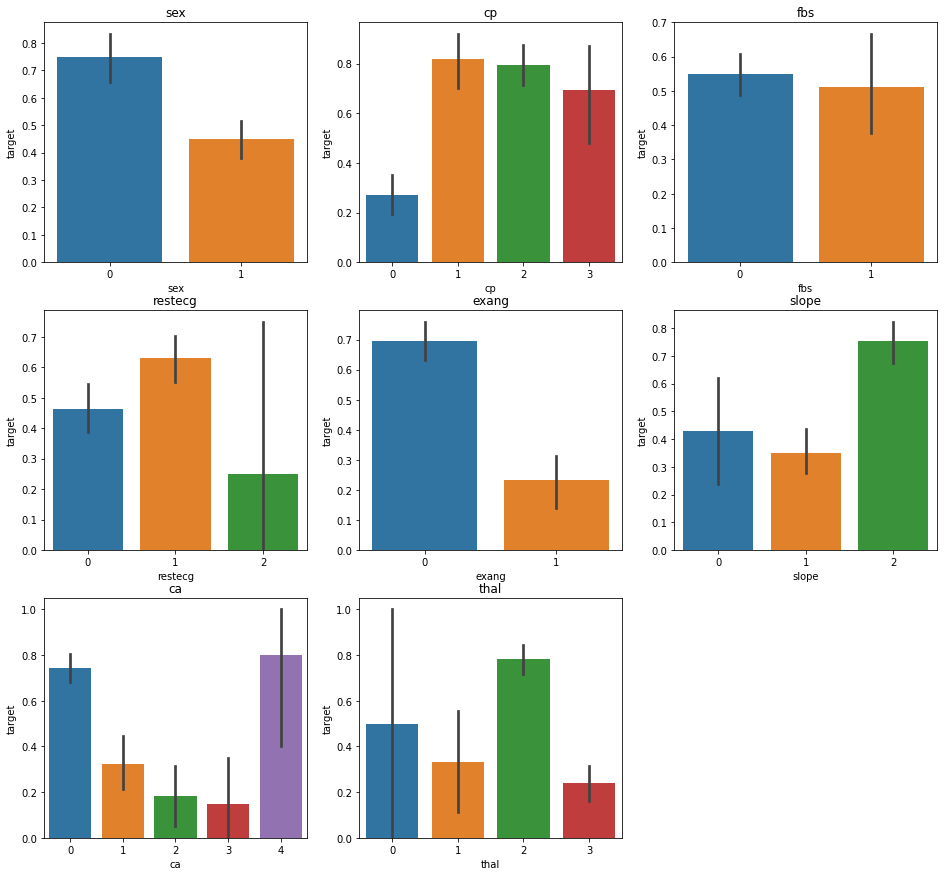

In [32]:
features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","target"]

kind_of_cat = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]

# The above features have 3/4 kinds of values, so lets plot borplot using seaborn

plt.figure(figsize = (16,15))
loc = 1
for feature in kind_of_cat:
    plt.subplot(3,3,loc)
    plt.title(feature)
    sns.barplot(x = feature, y = "target", data = heart)
    loc = loc +1

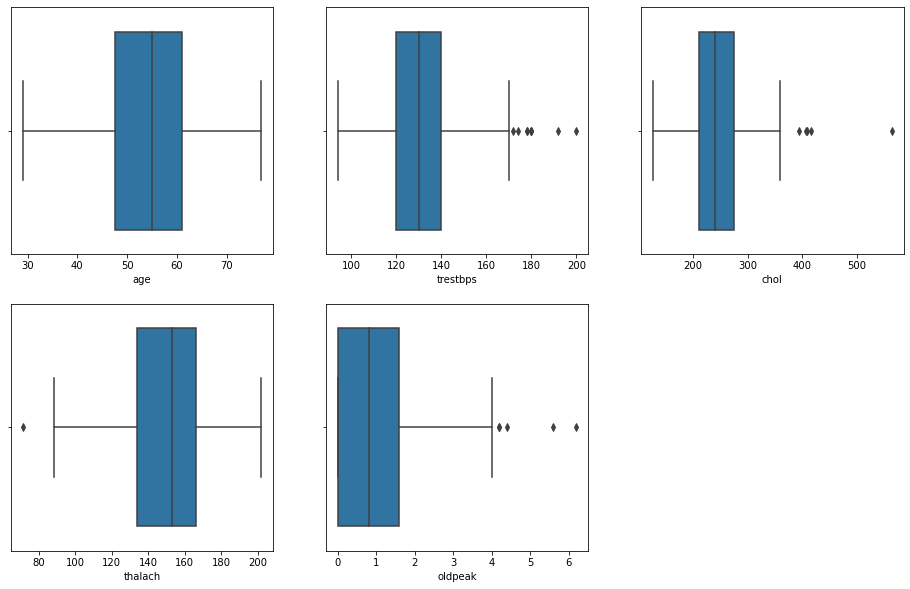

In [33]:
outliers = ["age","trestbps","chol","thalach","oldpeak"]
# Lets see if there are any outliers in these continious features
plt.figure(figsize = (16,10))
loc = 1
for feature in outliers:
    plt.subplot(2,3,loc)
    sns.boxplot(x = feature, data = heart)
    loc = loc + 1

From the above figure, we can see that we have quite a few outliers for trestbps, chol and oldpeak and only one outlier for thalach

As of now we are not handling the outliers.

If we want to handle the outliers, we can simply replace all the outlier datapoints with the 100 higher bond and lower bond values

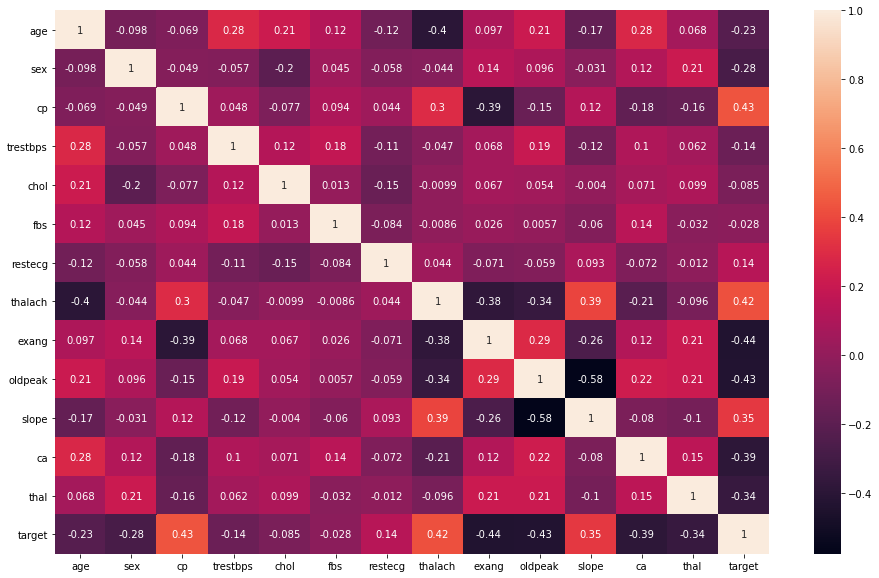

In [38]:
# Lets see the correlation of the features

plt.figure(figsize = (16,10))
sns.heatmap(heart.corr(), annot = True)
plt.show()

In [41]:
# Dividing the dependent and independent features

X = heart.drop('target', axis = 1)
y = heart['target']

In [47]:
# Lets split the data into train and test using train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [48]:
print("X_train :"+str(X_train.shape))
print("y_train :"+str(y_train.shape))
print("X_test :"+str(X_test.shape))
print("y_test :"+str(y_test.shape))

X_train :(242, 13)
y_train :(242,)
X_test :(61, 13)
y_test :(61,)


In [50]:
# Lets perform both Logestic Regression and Descision Tree

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [54]:
LR = LogisticRegression()

LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

In [55]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train, y_train)
DTC_pred = DTC.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score


In [57]:
print("accuracy score of LR is :"+str(accuracy_score(y_test , LR_pred)))
print("accuracy score of DTC is :"+str(accuracy_score(y_test , DTC_pred)))

accuracy score of LR is :0.8852459016393442
accuracy score of DTC is :0.8032786885245902


Logistic Regression model has given better score compared to Decision Tree classifier